<a href="https://colab.research.google.com/github/M-Raghavi/housepriceprediction_project/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House price prediction**

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#load the data set
df=pd.read_csv('/content/Housing (5).csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**EDA**

In [ ]:
#top three rows
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
df.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
#number of missing values in each column
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
#Over view of the data or summarize of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#dimensions
df.shape

(545, 13)

In [ ]:
#count the duplicate rows
df.duplicated().sum()


0

In [ ]:
count_guestroom=df['guestroom'].value_counts()
count_guestroom

,count
guestroom,
no,448
yes,97


<ipython-input-41-3bb3c5ff98a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_guestroom.index,y=count_guestroom.values,palette='mako')


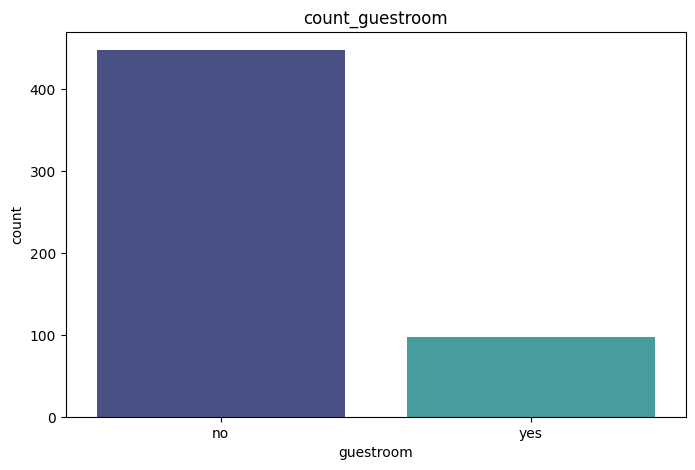

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=count_guestroom.index,y=count_guestroom.values,palette='mako')
plt.title('count_guestroom')
plt.xlabel('guestroom')
plt.ylabel('count')
plt.show()

In [ ]:
count_bedroom=df['bedrooms'].value_counts()
count_bedroom

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


<ipython-input-43-34e23b725a53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='viridis')


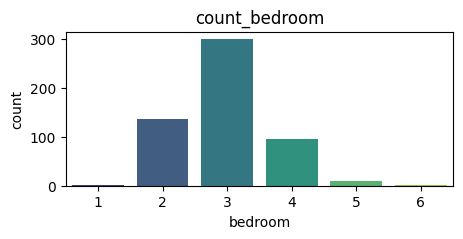

In [ ]:
plt.figure(figsize=(5,2))
ax=sns.barplot(x=count_bedroom.index,y=count_bedroom.values,palette='viridis')
plt.title('count_bedroom')
plt.xlabel('bedroom')
plt.ylabel('count')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [ ]:
#change the categorical features into numerical using encoding
categorical_columns = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [ ]:
#split into features and targets
X=df_encoded.drop('price',axis=1)
y=df_encoded['price']

In [ ]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn=knn.predict(X_test_scaled)
y_pred_knn

array([3924200., 7636188., 3738000., 3304000., 2973600., 5782000.,
       6458200., 4571000., 4611600., 5185600., 2863000., 3732400.,
       3249400., 4291000., 3853500., 4737600., 4541600., 4415600.,
       5810000., 6902000., 4853800., 5500600., 3337600., 3309600.,
       4433800., 2653000., 4995200., 2938600., 4669000., 3239600.,
       4219600., 4578700., 3887800., 4893000., 5299000., 3759000.,
       2973600., 5663000., 4852400., 4625600., 3159800., 2816800.,
       3955000., 6888000., 2826600., 4004000., 3262000., 5136600.,
       4429600., 3550400., 4501000., 3655400., 6265000., 2999500.,
       4835600., 3661000., 5803000., 6384000., 5978000., 4429600.,
       6559000., 6354600., 2646000., 7063000., 4410000., 5362000.,
       2816800., 3434200., 4445700., 4686500., 5577600., 7581000.,
       5269600., 3269000., 3176600., 3750600., 3918600., 6923000.,
       2943430., 3136000., 8238188., 2954000., 5773600., 3661000.,
       3094000., 4852400., 4709600., 2942800., 3679200., 86240

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mae=mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score:{r2}")

Mean Squared Error: 1261344709727.3027
Mean Absolute Error: 835134.8073394495
R^2 Score:0.6291107966049087


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
LinearRegression=LinearRegression()
LinearRegression.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_lr=LinearRegression.predict(X_test_scaled)
y_pred_lr

array([ 3488198.27691368,  8346828.14488227,  3345681.01612916,
        3365453.53729631,  2850910.60250494,  7263165.28784353,
        6574182.48798936,  4394023.70440398,  3982964.7285184 ,
        4688755.38912992,  2372924.52140772,  3896563.56065042,
        3657606.26650985,  5070859.4748516 ,  3775290.19711179,
        3758391.25685136,  5018023.507377  ,  4136986.87254141,
        6154179.02918091,  6505385.10799352,  5107452.29198951,
        6143663.24622472,  4301168.66062589,  3415361.58565043,
        4906415.0747856 ,  2622216.99417705,  4789559.27354993,
        3016727.94700217,  5731806.49461489,  2804520.2972063 ,
        4105822.78898577,  4646478.73165912,  3809609.72958803,
        5278263.34172412,  6427090.76004246,  2861187.02270627,
        2789901.89054057,  6314927.02997828,  5074355.81332497,
        4642532.55566925,  3592805.1233003 ,  2224106.5335669 ,
        3748372.24537225,  7244903.18596003,  3249637.25090936,
        4770751.71762156,  3722694.21271

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
mae=mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score:{r2}")

Mean Squared Error: 829690385060.8579
Mean Absolute Error: 736886.1661127878
R^2 Score:0.7560355994624843


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
y_pred3=rfr.predict(X_test_scaled)
y_pred3

array([3163020.        , 8194037.6       , 3692500.        ,
       3860710.        , 3100825.        , 7319480.        ,
       6003410.        , 4378500.        , 4678380.        ,
       4295550.        , 2339550.5       , 4315185.        ,
       3161480.        , 4521335.        , 3789695.        ,
       4282565.        , 5036850.        , 4272765.        ,
       5783610.        , 6923000.        , 5410020.        ,
       8101870.        , 4326910.        , 3844890.        ,
       4891810.        , 2853491.66666667, 3551520.        ,
       3276011.66666667, 6437620.        , 3281623.33333333,
       4361210.        , 4671380.        , 3862152.        ,
       5151930.        , 5169570.        , 2983676.5       ,
       3091322.5       , 6036450.        , 5051900.        ,
       4922540.        , 3483200.        , 2362850.        ,
       4241650.        , 7744472.4       , 2924981.5       ,
       4226285.        , 4105150.        , 6259050.        ,
       3746050.        ,

In [ ]:
# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
mae=mean_absolute_error(y_test, y_pred3)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score:{r2}")

Mean Squared Error: 914842294584.0286
Mean Absolute Error: 716821.7342507644
R^2 Score:0.7309973021223009




A heat map (or heatmap) is a data visualization technique that uses color to represent the magnitude of a phenomenon. It's essentially a graphical representation of data where individual values contained in a matrix are represented as colors.

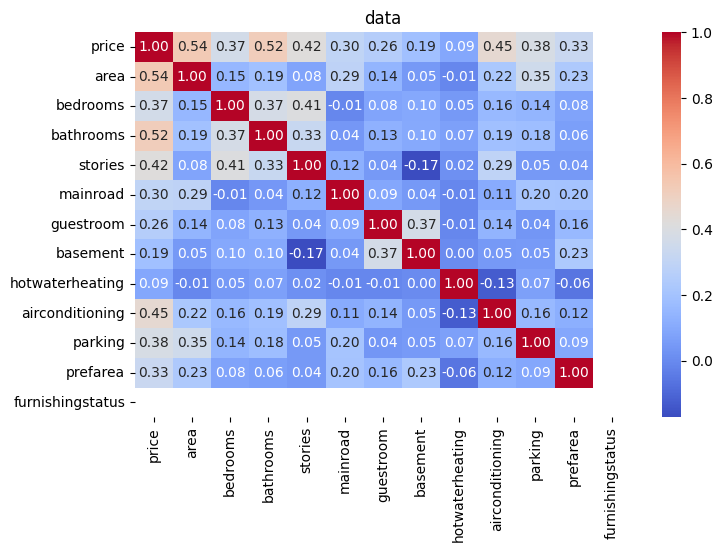

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    # Replace 'yes' with 1 and 'no' with 0
    df[column] = df[column].map({'yes': 1, 'no': 0}).astype(float)
    #If you have other string values than yes and no you need to impute or drop them.
plt.figure(figsize=(8, 5))
data = df.corr()  # Calculate correlation after converting
sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('data')
plt.show()

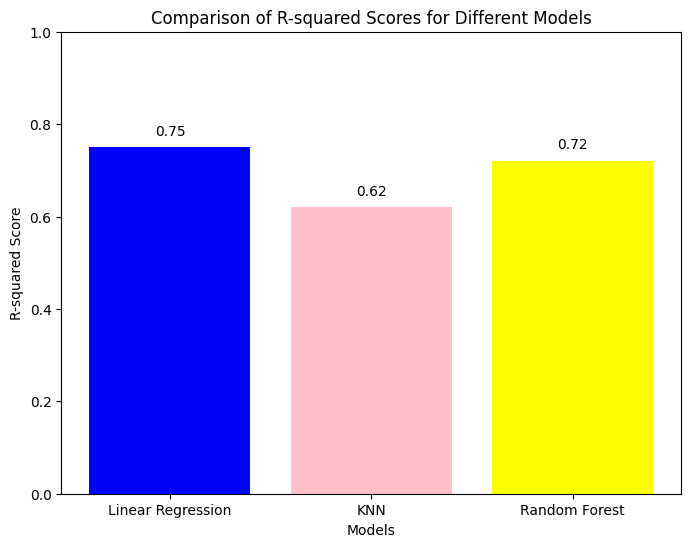

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# R-squared values
models = ['Linear Regression', 'KNN', 'Random Forest']
r2_scores = [0.75, 0.62, 0.72]
# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores, color=['blue', 'pink', 'yellow'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Models')
plt.ylim(0, 1)
# Add R-squared values on top of bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{r2:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Example of training data (df)
# Replace this with your actual training data
df = pd.DataFrame({
    'area': [5000, 7500, 6000],
    'bedrooms': [3, 4, 3],
    'bathrooms': [1, 2, 1],
    'stories': [2, 3, 2],
    'mainroad': ['yes', 'yes', 'no'],
    'guestroom': ['no', 'yes', 'no'],
    'basement': ['no', 'yes', 'no'],
    'hotwaterheating': ['no', 'no', 'no'],
    'airconditioning': ['yes', 'no', 'yes'],
    'parking': [1, 2, 0],
    'prefarea': ['no', 'yes', 'no'],
    'furnishingstatus': ['semi-furnished', 'furnished', 'unfurnished'],
    'price': [5000000, 7500000, 5500000]  # Target variable
})

# Convert the sample input to DataFrame
sample_input = {
    'area': 7420,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 3,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 2,
    'prefarea': 'yes',
    'furnishingstatus': 'furnished'
}

sample_input_df = pd.DataFrame([sample_input])

# Define categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply label encoding to categorical columns in both training and sample input
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    # Fit on the combined data (training + sample input)
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    sample_input_df[col] = label_encoders[col].transform(sample_input_df[col].astype(str))

# Prepare the data for training
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X, y)

# Predict the price for the sample input
predicted_sample_price = linear_regression.predict(sample_input_df)

# Output the predicted price for the sample input
print(f"Predicted House Price: {predicted_sample_price[0]:.2f}")


Predicted House Price: 7335496.11
